<a href="https://colab.research.google.com/github/Hemanthemu1852/Projects/blob/main/Copy_of_Sentimental_Analysis_139224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy download en_core_web_sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import re

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/sentimental analysis/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.isna().any()

review       False
sentiment    False
dtype: bool

In [ ]:
import string
nlp = spacy.load("en_core_web_sm")

In [ ]:
def preprocess_text(text):
    #formatted text
    text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com').replace('<br />', ' ')
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    # Removing all the occurrences of links that starts with https
    text = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    text = re.sub(r"\ [A-Za-z]*\.com", " ", text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = text.lower()
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    #Removing numbers from text
    pattern = r'[0-9]'
    # Match all digits in the string and replace them with an empty string
    text = re.sub(pattern, '', text)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ',text)
    text = repr(text)
    doc = nlp(text)
    tokens = [[token.text,token.lemma_] for token in doc]
    filtered = [token.text for token in doc if token.is_stop == False]
    text=" ".join(filtered)
    # Text without stopwords
    return text

In [ ]:
#html tags
from bs4 import BeautifulSoup
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [ ]:
data['review'] = data['review'].apply(preprocess_text)

In [ ]:
data['review'] = data['review'].apply(strip_html_tags)

In [ ]:
data['review']

0        ' reviewers mentioned watching oz episode ll h...
1        ' wonderful little production filming techniqu...
2        ' thought wonderful way spend time hot summer ...
3        ' basically s family little boy jake thinks s ...
4        ' petter matteis love time money visually stun...
                               ...                        
49995    ' thought movie right good job nt creative ori...
49996    ' bad plot bad dialogue bad acting idiotic dir...
49997    ' catholic taught parochial elementary schools...
49998    ' m going disagree previous comment maltin sec...
49999    ' expects star trek movies high art fans expec...
Name: review, Length: 50000, dtype: object

In [ ]:
data.head()

,review,sentiment
0,' reviewers mentioned watching oz episode ll h...,positive
1,' wonderful little production filming techniqu...,positive
2,' thought wonderful way spend time hot summer ...,positive
3,' basically s family little boy jake thinks s ...,negative
4,' petter matteis love time money visually stun...,positive


In [ ]:
Cleaned_IMDB = data.to_csv('/content/drive/My Drive/Cleaned_IMDB.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Cleaned_IMDB.csv')

In [ ]:
df

,review,sentiment
0,' reviewers mentioned watching oz episode ll h...,positive
1,' wonderful little production filming techniqu...,positive
2,' thought wonderful way spend time hot summer ...,positive
3,' basically s family little boy jake thinks s ...,negative
4,' petter matteis love time money visually stun...,positive
...,...,...
49995,' thought movie right good job nt creative ori...,positive
49996,' bad plot bad dialogue bad acting idiotic dir...,negative
49997,' catholic taught parochial elementary schools...,negative
49998,' m going disagree previous comment maltin sec...,negative


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49575,2
top,' loved todays variety solely cooking great st...,positive
freq,5,25000


In [ ]:
df.isna().any()

review       False
sentiment    False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode sentiment labels using LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])


In [ ]:
df['sentiment_encoded']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment_encoded, Length: 50000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df['review']
Y = df['sentiment_encoded']

train_x, test_x, y_train, y_test = train_test_split(X,Y,test_size = 0.2, shuffle = True , random_state = 43)

In [ ]:
!pip install wordcloud

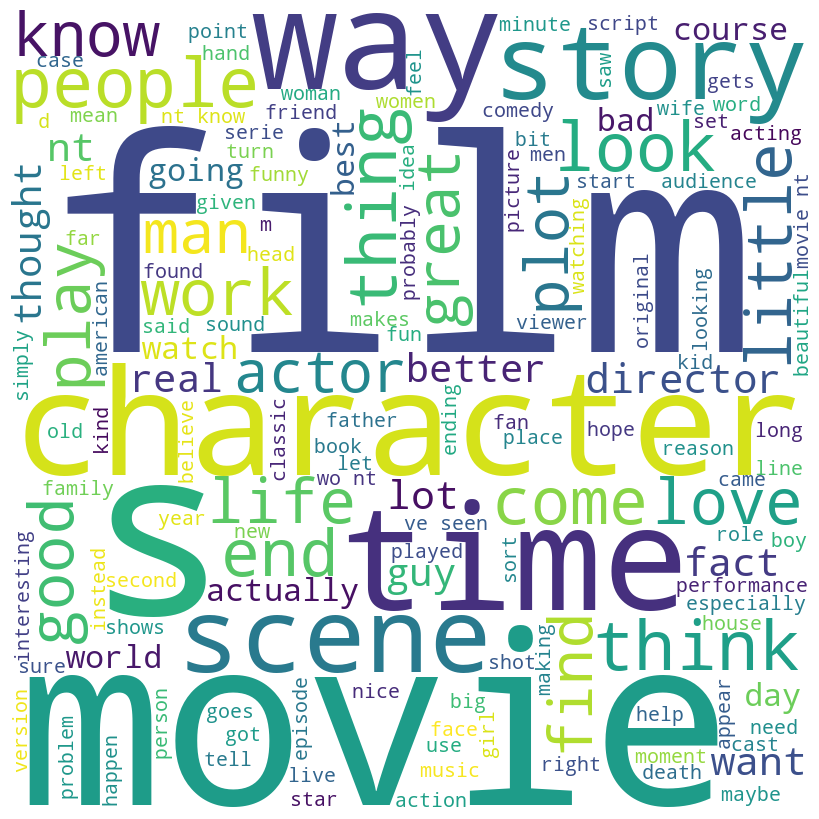

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the text column
text_data = ' '.join(df['review'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(text_data)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Fit and transform the training data using the vectorizer
X_train_vectorized = vectorizer.fit_transform(train_x)

# Transform the testing data using the same vectorizer
X_test_vectorized = vectorizer.transform(test_x)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initialize models
logreg_model = LogisticRegression()
# Fit the models on the training data
logreg_model.fit(X_train_vectorized, y_train)
# Predict on the testing data
logreg_pred = logreg_model.predict(X_test_vectorized)
# Calculate accuracy scores
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")

Logistic Regression Accuracy: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_pred = rf_model.predict(X_test_vectorized)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.85


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)
dt_pred = dt_model.predict(X_test_vectorized)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Decision Tree Accuracy: 0.73


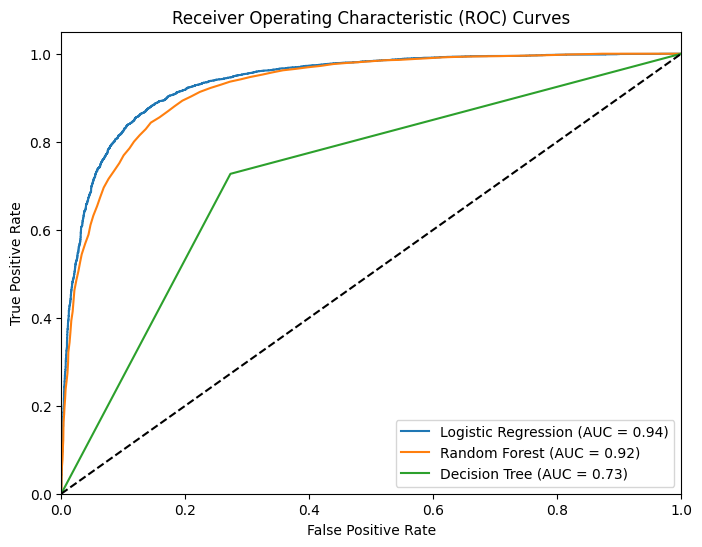

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
logreg_prob = logreg_model.predict_proba(X_test_vectorized)[:, 1]
rf_prob = rf_model.predict_proba(X_test_vectorized)[:, 1]
dt_prob = dt_model.predict_proba(X_test_vectorized)[:, 1]

# Calculate ROC curve and AUC for each model
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)

logreg_auc = roc_auc_score(y_test, logreg_prob)
rf_auc = roc_auc_score(y_test, rf_prob)
dt_auc = roc_auc_score(y_test, dt_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


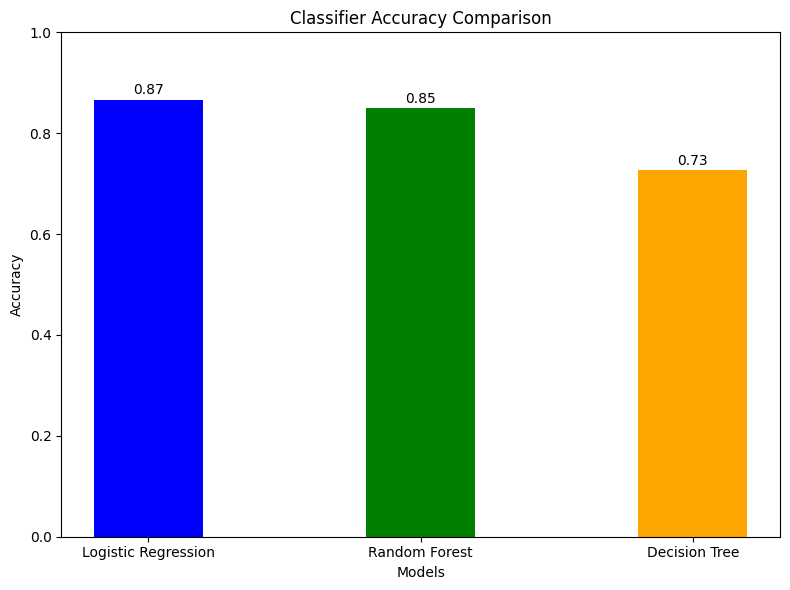

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores from your code
accuracies = [logreg_accuracy, rf_accuracy, dt_accuracy]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# Create a bar plot with reduced bar width
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'], width=0.4)  # Adjust the width as needed
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1

# Annotate the bars with the accuracy values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Example statement
example_statement = "I really enjoyed the movie. It was fantastic!"

# Preprocess the example statement (vectorize, transform, etc.)
# Replace these steps with your actual preprocessing steps
example_vectorized = vectorizer.transform([example_statement])  # Use the same vectorizer you used for training

# Predict the sentiment using the trained model
predicted_sentiment = logreg_model.predict(example_vectorized)

print(f"Predicted Sentiment: {predicted_sentiment[0]}")


Predicted Sentiment: 1
